<a href="https://colab.research.google.com/github/mariajosemuskusl/Integracion-de-Datos-y-Prospectiva/blob/main/1_Caracterizaci%C3%B3n_VA_Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Gestión Riesgo Operacional - EVERGREEN**

En este espacio de trabajo se plantea como caso de estudio el análisis de los riesgos asociados a las operaciones del negocio de la Naviera EVERGREEN. Esta naviera Taiwanesa opera en 240 puertos alrededor del mundo utilizando 150 buques Canal de Panamá.

Los riesgos operacionales a los cuales está expuesta la naviera están relacionados con la logística portuaria frente a la carga y descarga de contenedores. De esta manera este riesgo operacional se describe a través de dos variables aleatorias:

* Frecuencia: Indica el número de contenedores que se quedan en tierra por semana (tiempo).
* Severidad (KUSD) : Indica el costo de solucionar cada evento de riesgo.
* Distribución Agregada de las pérdidas: Producto entre la severidad y la frecuencia da como resultado la distribución agregada de las pérdidas (LDA - Loss Distribution Approach) y es precisamente que se hará la caracterización de esta distribución utilizando las medidas de tendencia central (media, desviación) y las medidas de dispersión (coeficiente de asimetría, Kurtosis).


0. Cargar las librerías de trabajo

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns #Esta librería para el trabajo estadístico
import matplotlib.pyplot as plt #Esta librería para gráficos

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Se cargan los archivos de trabajo

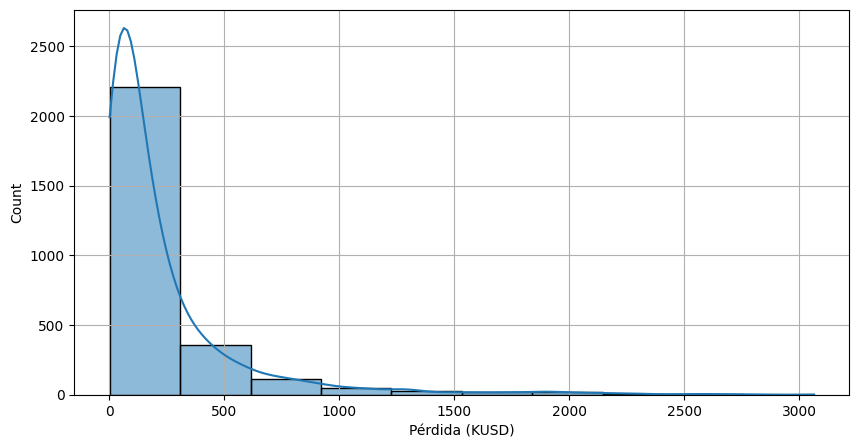

,Media,Varianza,Desviación,Asimetría,Curtosis
LDA,279.651095,102317.972226,319.871806,3.792311,17.131316


In [ ]:
nxl='/content/drive/MyDrive/University/Integración de Datos y Prospectiva/Clases/1. RiesgoOperacional_EVERGREEEN.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB.head(10)

#Procedemos con la construcción de la distribución agregada de las pérdidas
Freq=XDB.iloc[:,3]
Sev=XDB.iloc[:,4]
LDA=Freq*Sev

#Se procede con la construcción de la distribución agregada de las pérdidas
plt.figure(figsize=(10,5))
sns.histplot(LDA,bins=10,kde=True)
plt.xlabel("Pérdida (KUSD)")
plt.grid()
plt.show()

#Procedemos con la caracterización de las variables aleatorias de frecuencia, severidad y LDA, es importante para los
#métodos indicar cuales son las variables de recepción de los resultados que arroja un método
p1,p2,p3,p4,p5=Caracterización_VA(LDA)
Tbp=np.column_stack((p1,p2,p3,p4,p5))
dfbp=pd.DataFrame(Tbp,columns=['Media','Varianza','Desviación','Asimetría','Curtosis'])
dfbp.index=['LDA']
display(dfbp)

p1,p2,p3,p4,p5=Caracterización_VA(Freq)
p1,p2,p3,p4,p5=Caracterización_VA(Sev)

1.5. Se crea el método para la caracterización de variables aleatorias (Frecuencia, Severidad, Distribución de las Pérdidas)

In [ ]:
#Para crear un método de caracterización de variables
def Caracterización_VA(X):  #Recibe una variable

  NI=10 #Indica el número de clusters
  counts, bin_edges=np.histogram(LDA,bins=NI)
  XC=(bin_edges[:-1]+bin_edges[1:])/2
  Prob=counts/np.sum(counts)

  #Calculamos las medidas de tendencia central
  #Medidas de Tendencia y Dispersión
  u=np.sum(XC*Prob)
  var=np.sum(Prob*(XC-u)**2)
  sigma=np.sqrt(var)
  CAs=np.sum(Prob*(XC-u)**3)/sigma**3
  Kur=np.sum(Prob*(XC-u)**4)/sigma**4-3

  return u,var,sigma,CAs,Kur #También son propiedades del método

2. Se procede con la clusterización estadística. La clusterización estadística está definida por el Histograma de Frecuencias.

In [ ]:
np.set_printoptions(suppress=True)
NI=10 #Indica el número de clusters
counts, bin_edges=np.histogram(LDA,bins=NI)
print("El número de datos por intervalo es:")
print(counts)
print ("Los intervalos inferiores:")
print(bin_edges[:-1])
print("Los intervalos superiores:")
print(bin_edges[1:])
XC=(bin_edges[:-1]+bin_edges[1:])/2
Prob=counts/np.sum(counts)
print("La probabilidad:")
print(Prob)

#Medidas de Tendencia y Dispersión
u=np.sum(XC*Prob)
print("La media es:",u)
var=np.sum(Prob*(XC-u)**2)
print("La varianza es:",var)
sigma=np.sqrt(var)
print("La desviación es:",sigma)
CAs=np.sum(Prob*(XC-u)**3)/sigma**3
print("El coeficiente de asimetría es:",CAs)
Kur=np.sum(Prob*(XC-u)**4)/sigma**4-3
print("El coeficiente de curtosis es:",Kur)

#Se configura la tabla de los datos
Tabla=np.column_stack((bin_edges[:-1],bin_edges[1:],XC,counts, Prob))
df=pd.DataFrame(Tabla,columns=['LI','LS','XC','ND', 'Prob'])
df.head(10)

El número de datos por intervalo es:
[2209  356  116   46   27   18   20    7    4    1]
Los intervalos inferiores:
[   2.59919687  308.92945016  615.25970344  921.58995673 1227.92021002
 1534.25046331 1840.5807166  2146.91096988 2453.24122317 2759.57147646]
Los intervalos superiores:
[ 308.92945016  615.25970344  921.58995673 1227.92021002 1534.25046331
 1840.5807166  2146.91096988 2453.24122317 2759.57147646 3065.90172975]
La probabilidad:
[0.78780314 0.12696148 0.04136947 0.01640514 0.0096291  0.0064194
 0.00713267 0.00249643 0.00142653 0.00035663]
La media es: 279.6510949925361
La varianza es: 102317.97222569383
La desviación es: 319.87180592495775
El coeficiente de asimetría es: 3.792311305904773
El coeficiente de curtosis es: 17.131316115151854


,LI,LS,XC,ND,Prob
0,2.599197,308.929450,155.764324,2209.0,0.787803
1,308.929450,615.259703,462.094577,356.0,0.126961
2,615.259703,921.589957,768.424830,116.0,0.041369
3,921.589957,1227.920210,1074.755083,46.0,0.016405
4,1227.920210,1534.250463,1381.085337,27.0,0.009629
5,1534.250463,1840.580717,1687.415590,18.0,0.006419
6,1840.580717,2146.910970,1993.745843,20.0,0.007133
7,2146.910970,2453.241223,2300.076097,7.0,0.002496
8,2453.241223,2759.571476,2606.406350,4.0,0.001427
9,2759.571476,3065.901730,2912.736603,1.0,0.000357


3. Se calculan las métricas estadísticas de tendencia central y dispersión: Media, Desviación, Asimetría y Kurtosis

In [ ]:
u=np.mean(LDA)
var=np.var(LDA)
sigma=np.std(LDA)

T2=np.column_stack((u,var,sigma))
df2=pd.DataFrame(T2,columns=['Media','Varianza','Desviación'])
df2.head(1)

,Media,Varianza,Desviación
0,231.266602,115581.511672,339.97281


In [ ]:
from scipy.stats import skew, kurtosis

#Calculate Skewness
lda_skew=skew(LDA)

#Calculate Kurtosis
lda_kurtosis=kurtosis(LDA)

#Optionally, add to the DataFrame with other metrics
df2_temp = df2.copy()
df2_temp['Asimetria']=lda_skew
df2_temp['Kurtosis']=lda_kurtosis

display(df2_temp)

,Media,Varianza,Desviación,Asimetria,Kurtosis
0,231.266602,115581.511672,339.97281,3.389058,14.577132


4. Método Integración 1: Método de Montecarlo, es un método que utiliza una ruleta cargada, dependiendo de las probabilidades que genera el histograma

,Media,Varianza,Desviación,Asimetría,Curtosis
LDA,279.651095,102317.972226,319.871806,3.792311,17.131316


,Media,Varianza,Desviación,Asimetría,Curtosis
LDAm,279.651095,102317.972226,319.871806,3.792311,17.131316


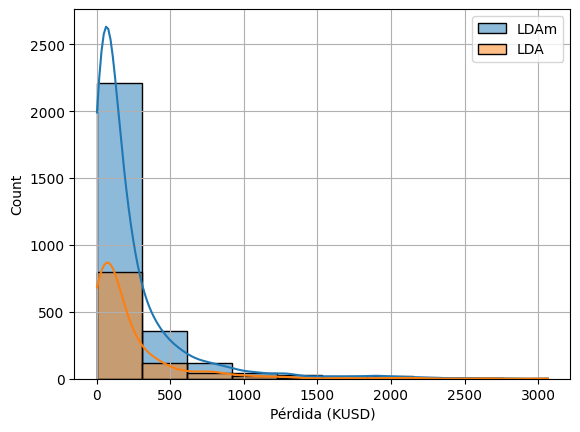

In [ ]:
np.random.seed(42)
LDAm=LDA.sample(n=1000, replace=True)

#Probamos la variable antes
p1,p2,p3,p4,p5=Caracterización_VA(LDA) #Antes - con la variable original
Tbp=np.column_stack((p1,p2,p3,p4,p5))
dfp=pd.DataFrame(Tbp,columns=['Media','Varianza','Desviación','Asimetría','Curtosis'])
dfp.index=['LDA']
display(dfp)

#Probamos la variable después
p1,p2,p3,p4,p5=Caracterización_VA(LDAm) #Después - es la variable muestrada
Tbp=np.column_stack((p1,p2,p3,p4,p5))
dfp=pd.DataFrame(Tbp,columns=['Media','Varianza','Desviación','Asimetría','Curtosis'])
dfp.index=['LDAm']
display(dfp)

#Para visualizar las dos distribuciones en una sola gráfica
plt.figure
sns.histplot(LDA,bins=10,kde=True,label='LDAm')
sns.histplot(LDAm,bins=10,kde=True,label='LDA')
plt.xlabel("Pérdida (KUSD)")
plt.grid()
plt.legend()
plt.show()

**Análisis de resultados**

De las métricas de tendencia central y dispersión, podemos observar que los datos tienen la tendencia a ubicarse por debajo de la media como lo muestra el coeficiente de asimetría (3.3890), el cual esta por encima de la unidad, lo que indica que en general las pérdidas por dejar contenedores en tierra son pérdidas menores (pérdidas esperadas-no asegurables). Por su parte el coeficiente de curtosis, muestra que los datos se encuentran muy concentrados al lado izquierdo de la media de la distribución de las pérdidas, tal y como se puede observar en la gráfica del histograma de frecuencias. Esto refuerza la idea de menores pérdidas.